In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as ms

In [2]:
# 1. BUSINESS PROBLEM
# ===============================================
"""
OBJECTIVE:
Analyze Amazon sales data to understand:
1. Product pricing strategies and discount patterns
2. Customer rating and review behavior
3. Top-performing categories and products
4. Price-rating relationships
5. Provide actionable insights for sellers and buyers
""" ##

'\nOBJECTIVE:\nAnalyze Amazon sales data to understand:\n1. Product pricing strategies and discount patterns\n2. Customer rating and review behavior\n3. Top-performing categories and products\n4. Price-rating relationships\n5. Provide actionable insights for sellers and buyers\n'

In [3]:
## Data Loading
df=pd.read_csv("C:\\Users\\ppagi\\Downloads\\Amazon_Sales_data.csv")
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [4]:
# Data Overview

In [5]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [6]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,02-10-2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [7]:
df.shape

(100, 14)

In [8]:
df.size

1400

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [10]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [11]:
df.duplicated().sum()

0

In [12]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

<Axes: >

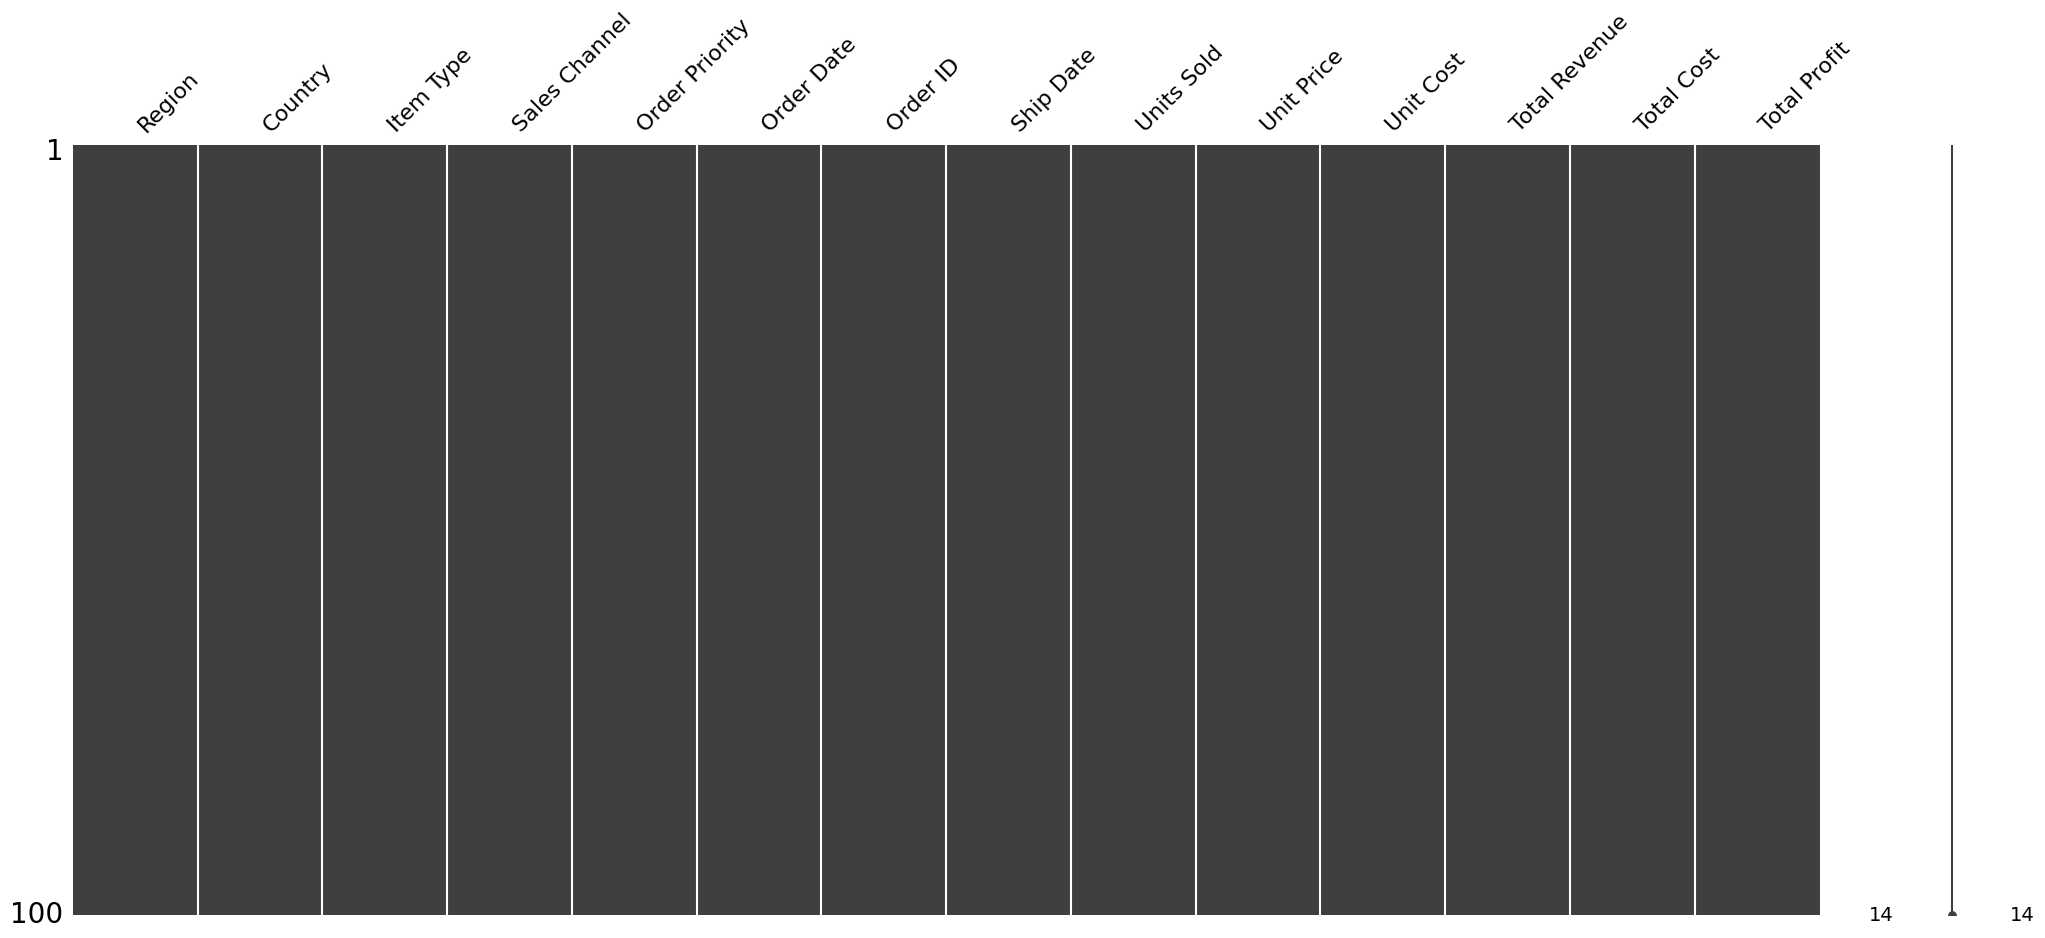

In [13]:
ms.matrix(df)

In [14]:
# Clean text columns (remove extra spaces)
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')


In [15]:
df.columns

Index(['region', 'country', 'item_type', 'sales_channel', 'order_priority',
       'order_date', 'order_id', 'ship_date', 'units_sold', 'unit_price',
       'unit_cost', 'total_revenue', 'total_cost', 'total_profit'],
      dtype='object')

In [42]:
# Check and PRINT negative values
numeric_cols = ['units_sold', 'unit_price', 'unit_cost', 'total_revenue', 'total_cost', 'total_profit']

print("\n=== CHECKING FOR NEGATIVE VALUES ===")
for col in numeric_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        print(f" {col}: {negative_count} negative values found")
    else:
        print(f" {col}: No negative values")

# Optional: Remove negative values if they're errors
# df = df[(df['units_sold'] > 0) & (df['total_revenue'] > 0)]
   


=== CHECKING FOR NEGATIVE VALUES ===
 units_sold: No negative values
 unit_price: No negative values
 unit_cost: No negative values
 total_revenue: No negative values
 total_cost: No negative values
 total_profit: No negative values


In [17]:
df['order_date'] = pd.to_datetime(
    df['order_date'],
    infer_datetime_format=True,
    dayfirst=False,
    errors='coerce'
)

df['order_date'] = df['order_date'].dt.strftime('%m-%d-%y')


C:\Users\ppagi\AppData\Local\Temp\ipykernel_25616\556165545.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['order_date'] = pd.to_datetime(


In [18]:
df['order_date']=pd.to_datetime(df['order_date'],errors='coerce')

C:\Users\ppagi\AppData\Local\Temp\ipykernel_25616\2847738484.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['order_date']=pd.to_datetime(df['order_date'],errors='coerce')


In [19]:
df['ship_date']=pd.to_datetime(df['ship_date'],errors='coerce')

In [20]:
df['order_date']=df['order_date'].interpolate()

In [21]:
df['ship_date']=df['ship_date'].interpolate()

In [22]:
# Extract date features
df['year']=df['order_date'].dt.year
df['year']

0     2010
1     2012
2     2013
3     2014
4     2013
      ... 
95    2011
96    2012
97    2014
98    2015
99    2015
Name: year, Length: 100, dtype: int32

In [23]:
df['month']=df['order_date'].dt.month
df['month']

0      5
1      8
2      7
3      6
4      5
      ..
95     7
96    11
97     3
98     7
99     7
Name: month, Length: 100, dtype: int32

In [24]:
df['quarter']=df['order_date'].dt.quarter
df['quarter']

0     2
1     3
2     3
3     2
4     2
     ..
95    3
96    4
97    1
98    3
99    3
Name: quarter, Length: 100, dtype: int32

In [25]:
df['day_of_week']=df['order_date'].dt.day_name()
df['day_of_week']

0        Friday
1     Wednesday
2        Sunday
3        Friday
4        Friday
        ...    
95      Tuesday
96       Sunday
97       Friday
98     Thursday
99     Thursday
Name: day_of_week, Length: 100, dtype: object

In [26]:
df['month_name']=df['order_date'].dt.month_name()
df['month_name']

0          May
1       August
2         July
3         June
4          May
        ...   
95        July
96    November
97       March
98        July
99        July
Name: month_name, Length: 100, dtype: object

In [27]:
df['profit_margin']=df['total_profit']/df['total_revenue'] *100
df['profit_margin']

0     37.550924
1     43.067574
2     19.386987
3     25.830654
4     19.386987
        ...    
95    67.203514
96    25.830654
97    40.977541
98    30.661936
99    24.799856
Name: profit_margin, Length: 100, dtype: float64

In [28]:
df['revenue_per_unit']=df['total_revenue']/df['units_sold']
df['revenue_per_unit']

0     255.28
1     205.70
2     651.21
3       9.33
4     651.21
       ...  
95    109.28
96      9.33
97    154.06
98     81.73
99    668.27
Name: revenue_per_unit, Length: 100, dtype: float64

In [44]:
df['cost_per_unit'] = df['total_cost'] / df['units_sold']
df['cost_per_unit']

0     159.42
1     117.11
2     524.96
3       6.92
4     524.96
       ...  
95     35.84
96      6.92
97     90.93
98     56.67
99    502.54
Name: cost_per_unit, Length: 100, dtype: float64

In [30]:
df['delivery_time_days'] = (df['ship_date'] - df['order_date']).dt.days.abs()
df['delivery_time_days']

0       30
1       24
2       88
3      199
4      408
      ... 
95      14
96     334
97     823
98     463
99    1261
Name: delivery_time_days, Length: 100, dtype: int64

In [31]:
# Revenue category
df['revenue_category'] = pd.cut(df['total_revenue'], 
                                bins=[0, 10000, 50000, 100000, float('inf')],
                                labels=['Low', 'Medium', 'High', 'Very High'])


In [32]:
monthly_sales = df.groupby(['year', 'month']).agg({
    'total_revenue': 'sum',
    'total_profit': 'sum',
    'units_sold': 'sum',
    'order_id': 'count'
}).reset_index()
monthly_sales

,year,month,total_revenue,total_profit,units_sold,order_id
0,2010,5,2533654.00,951410.50,9925,1
1,2010,6,1082418.40,727423.20,9905,1
2,2010,10,6064933.75,1495392.79,14403,2
3,2010,11,3458252.00,1375311.70,7910,1
4,2010,12,2581786.39,641587.28,4103,2
...,...,...,...,...,...,...
56,2016,11,5876405.20,2336986.67,13441,2
57,2016,12,3876652.40,1541705.29,8867,1
58,2017,1,2914130.27,879507.12,13030,2
59,2017,2,1532324.76,531064.98,12397,2


<Figure size 1000x600 with 0 Axes>

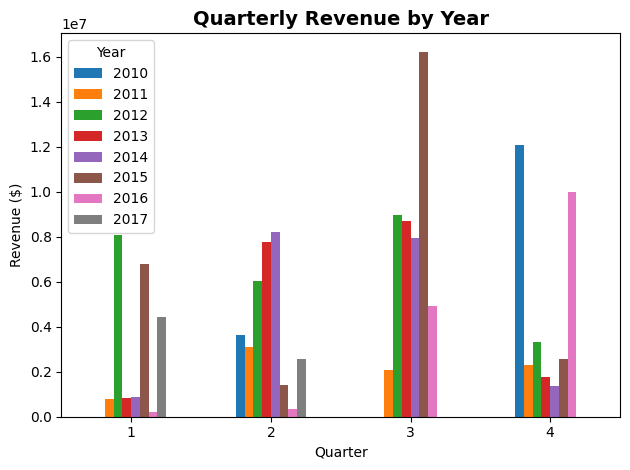

In [49]:
# 2. Quarterly Sales (ADDED VISUALIZATION)
quarterly_sales = df.groupby(['year', 'quarter']).agg({
    'total_revenue': 'sum',
    'total_profit': 'sum',
    'units_sold': 'sum',
    'order_id': 'count'
}).reset_index()

pivot_quarterly = quarterly_sales.pivot(index='quarter', columns='year', values='total_revenue')

plt.figure(figsize=(10, 6))
pivot_quarterly.plot(kind='bar')
plt.title('Quarterly Revenue by Year', fontsize=14, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Revenue ($)')
plt.legend(title='Year')
plt.xticks(rotation=0)
plt.tight_layout()
plt.savefig("quarterly.png")   
plt.show()

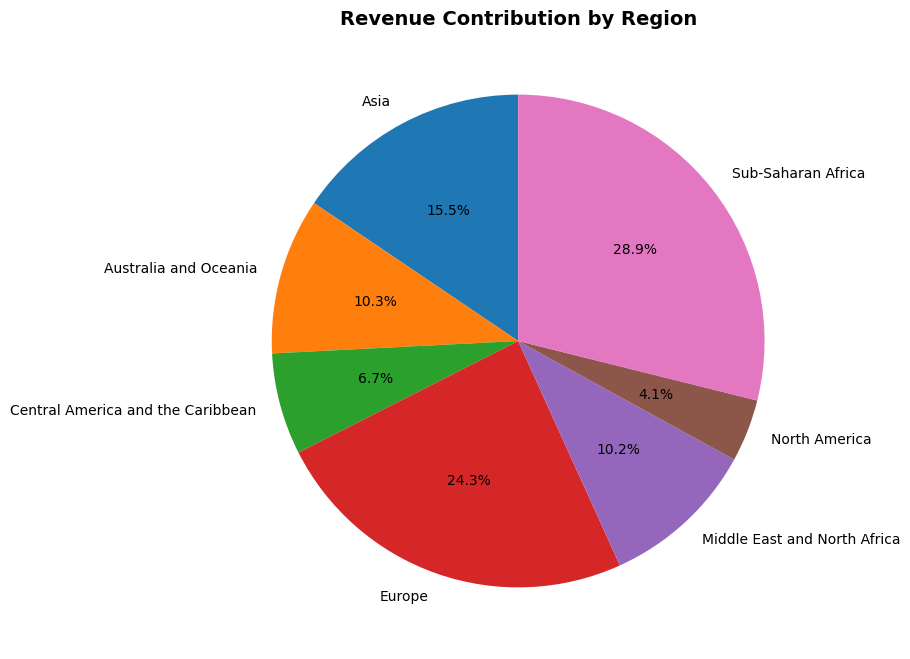

In [55]:
region_contribution = df.groupby('region')['total_revenue'].sum()
plt.figure(figsize=(10, 8))
plt.pie(region_contribution, labels=region_contribution.index, autopct='%1.1f%%', startangle=90)
plt.title('Revenue Contribution by Region', fontsize=14, fontweight='bold')
plt.savefig("region.png")   
plt.show()

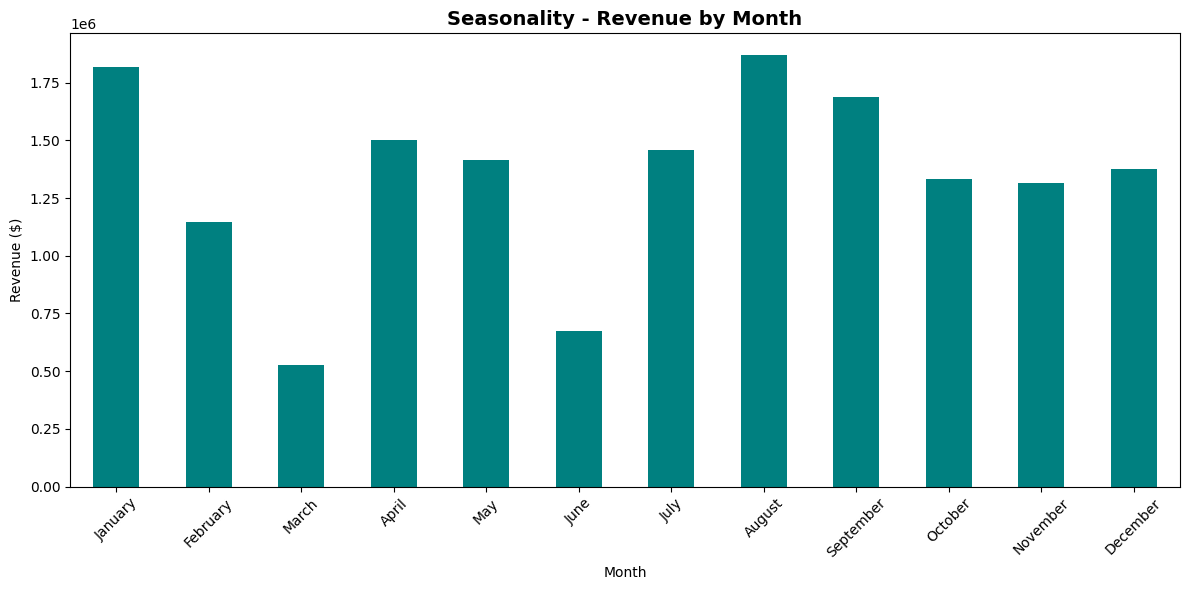

In [54]:
# Month-wise sales pattern
month_sales = df.groupby('month_name')['total_revenue'].mean()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_sales = month_sales.reindex(month_order)
plt.figure(figsize=(12, 6))
month_sales.plot(kind='bar', color='teal')
plt.title('Seasonality - Revenue by Month', fontsize=14, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("seasonality.png")   
plt.show()

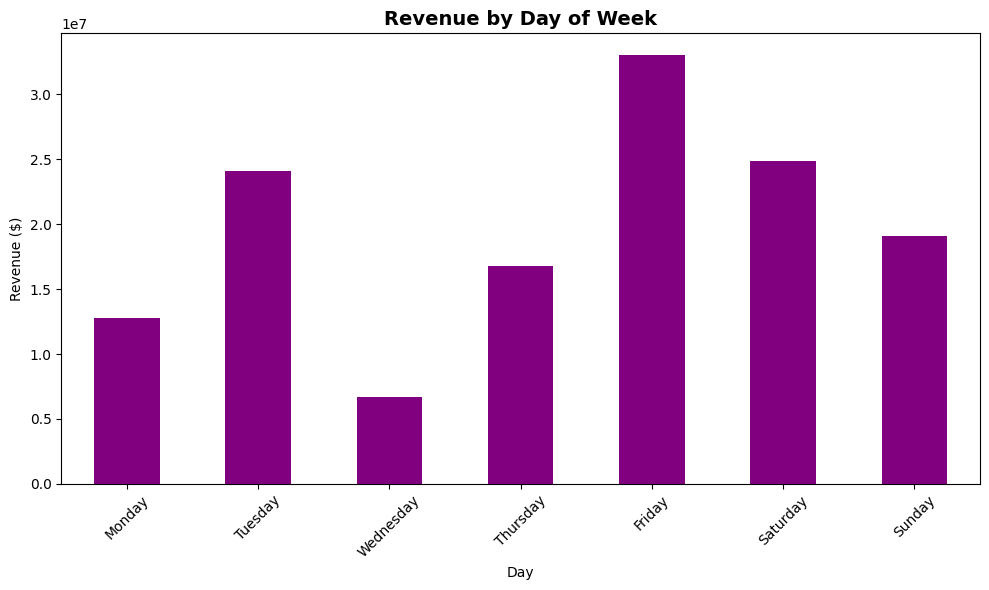

In [53]:
# Day of week pattern
dow_sales = df.groupby('day_of_week')['total_revenue'].sum()
dow_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dow_sales = dow_sales.reindex(dow_order)

plt.figure(figsize=(10, 6))
dow_sales.plot(kind='bar', color='purple')
plt.title('Revenue by Day of Week', fontsize=14, fontweight='bold')
plt.xlabel('Day')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("revenune_day.png")   
plt.show()

In [37]:
# Region + Channel performance
cohort = df.groupby(['region', 'sales_channel']).agg({
    'total_revenue': 'sum',
    'total_profit': 'sum',
    'profit_margin': 'mean'
}).reset_index()
cohort

,region,sales_channel,total_revenue,total_profit,profit_margin
0,Asia,Offline,12146097.76,3584286.33,31.139805
1,Asia,Online,9200993.26,2529559.54,42.831709
2,Australia and Oceania,Offline,4201867.85,1886283.82,45.206293
3,Australia and Oceania,Online,9892397.28,2835876.21,27.847057
4,Central America and the Caribbean,Offline,8254112.19,2475814.99,39.087490
5,Central America and the Caribbean,Online,916273.30,371092.86,39.602997
6,Europe,Offline,18122486.45,5574539.91,34.874729
7,Europe,Online,15246445.66,5508398.72,39.450385
8,Middle East and North Africa,Offline,4993138.88,2169081.08,53.486249
9,Middle East and North Africa,Online,9059567.70,3592110.78,35.836001


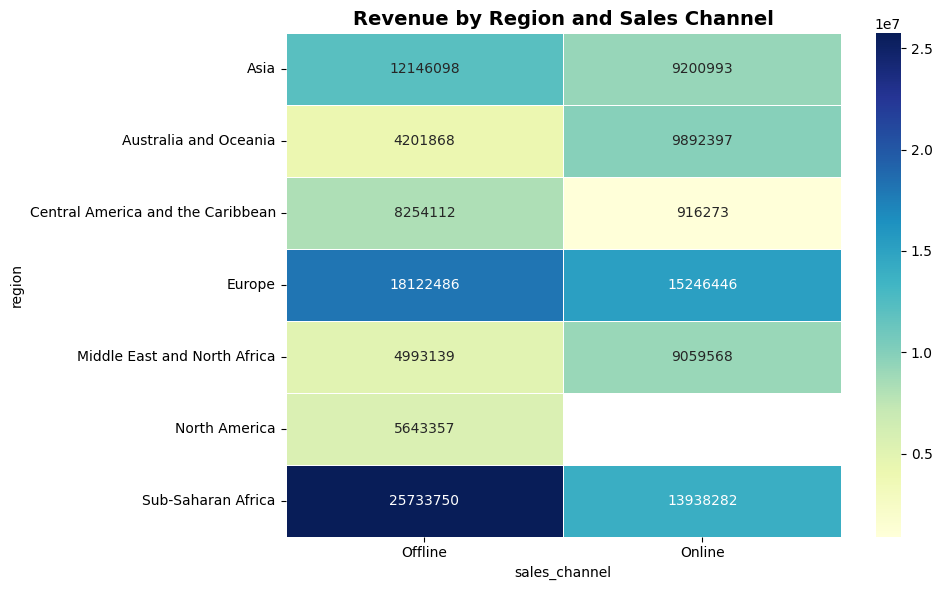

In [52]:
# Pivot for heatmap
pivot_revenue = cohort.pivot(index='region', columns='sales_channel', values='total_revenue')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_revenue, annot=True, fmt='.0f', cmap='YlGnBu', linewidths=0.5)
plt.title('Revenue by Region and Sales Channel', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("correlation.png")   
plt.show()

In [39]:
# Detect outliers in revenue
Q1 = df['total_revenue'].quantile(0.25)
Q3 = df['total_revenue'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['total_revenue'] < lower_bound) | (df['total_revenue'] > upper_bound)]

print(f"Total outliers in revenue: {len(outliers)} ({(len(outliers)/len(df))*100:.2f}%)")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")

Total outliers in revenue: 3 (3.00%)
Lower bound: $-2,646,263.99
Upper bound: $5,127,029.89


In [40]:
#  KEY METRICS & INSIGHTS
total_revenue = df['total_revenue'].sum()
total_profit = df['total_profit'].sum()
total_cost = df['total_cost'].sum()
total_orders = df['order_id'].nunique()
total_units = df['units_sold'].sum()
avg_order_value = df.groupby('order_id')['total_revenue'].sum().mean()
avg_profit_margin = df['profit_margin'].mean()
avg_delivery_time = df['delivery_time_days'].mean()

In [47]:

print(f"\n Financial Metrics:")
print(f"   Total Revenue: ${total_revenue:,.2f}")
print(f"   Total Profit: ${total_profit:,.2f}")
print(f"   Total Cost: ${total_cost:,.2f}")
print(f"   Overall Profit Margin: {(total_profit/total_revenue)*100:.2f}%")

print(f"\n Operational Metrics:")
print(f"   Total Orders: {total_orders:,}")
print(f"   Total Units Sold: {total_units:,}")
print(f"   Average Order Value: ${avg_order_value:,.2f}")
print(f"   Average Units per Order: {total_units/total_orders:.1f}")
print(f"   Average Delivery Time: {avg_delivery_time:.1f} days")


 Financial Metrics:
   Total Revenue: $137,348,768.31
   Total Profit: $44,168,198.40
   Total Cost: $93,180,569.91
   Overall Profit Margin: 32.16%

 Operational Metrics:
   Total Orders: 100
   Total Units Sold: 512,871
   Average Order Value: $1,373,487.68
   Average Units per Order: 5128.7
   Average Delivery Time: 348.8 days


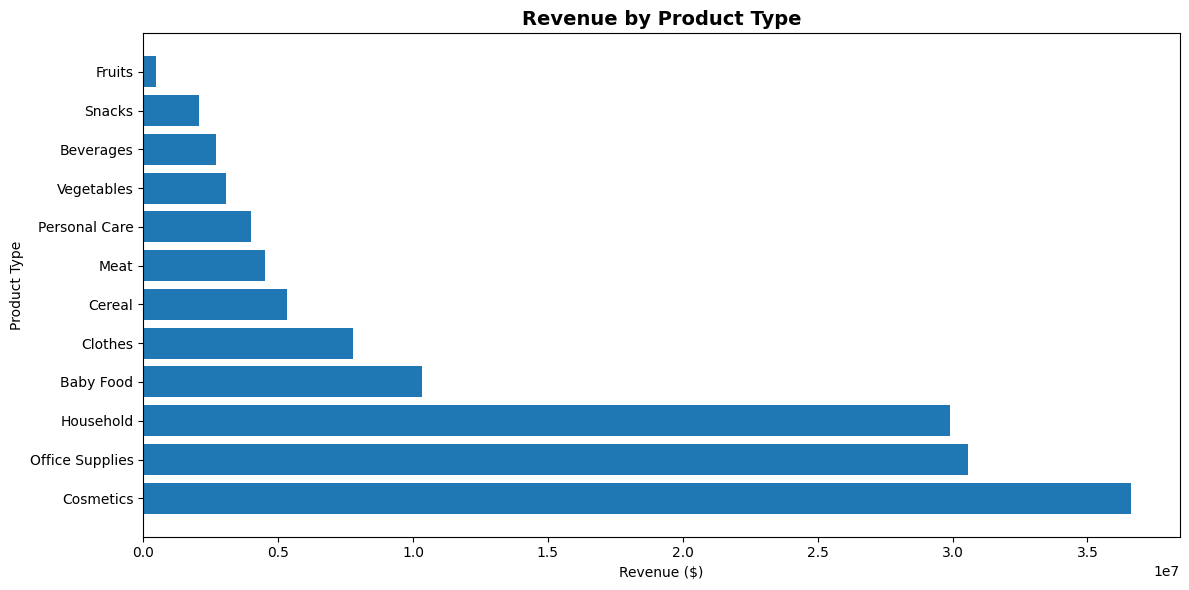

In [51]:
# ===== PRODUCT ANALYSIS =====
product_performance = df.groupby('item_type').agg({
    'total_revenue': 'sum',
    'total_profit': 'sum',
    'units_sold': 'sum',
    'profit_margin': 'mean'
}).reset_index().sort_values('total_revenue', ascending=False)

# Visualize
plt.figure(figsize=(12, 6))
plt.barh(product_performance['item_type'], product_performance['total_revenue'])
plt.title('Revenue by Product Type', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.ylabel('Product Type')
plt.tight_layout()
plt.savefig("revenue.png")   
plt.show()

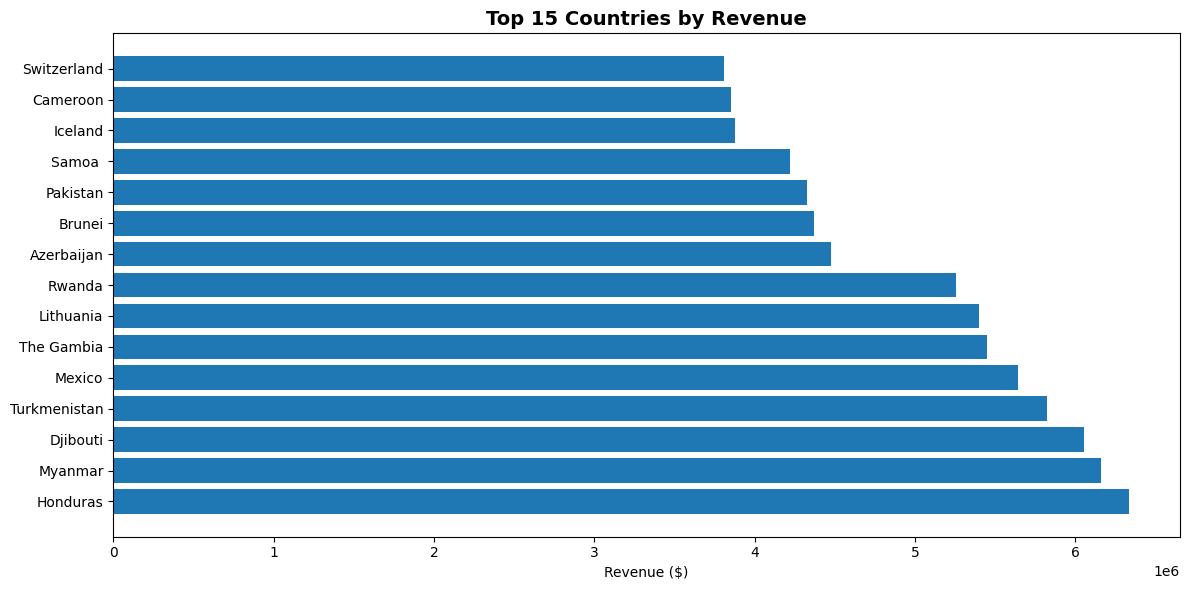

In [50]:
# ===== COUNTRY ANALYSIS =====
top_countries = df.groupby('country').agg({
    'total_revenue': 'sum',
    'total_profit': 'sum'
}).reset_index().sort_values('total_revenue', ascending=False).head(15)

plt.figure(figsize=(12, 6))
plt.barh(top_countries['country'], top_countries['total_revenue'])
plt.title('Top 15 Countries by Revenue', fontsize=14, fontweight='bold')
plt.xlabel('Revenue ($)')
plt.tight_layout()
plt.savefig("countries.png")   
plt.show()